# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 3. Сравнение оценок и эффективные оценки

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача в этом задании оценивается в **15 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [39]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [3]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)

norm_X = norm_distr.rvs(N)
laplacain_X = laplacian_distr.rvs(N)
cauchy_X = cauchy_distr.rvs(N)

Постройте график плотности распределения для всех трех распределений на одних осях.

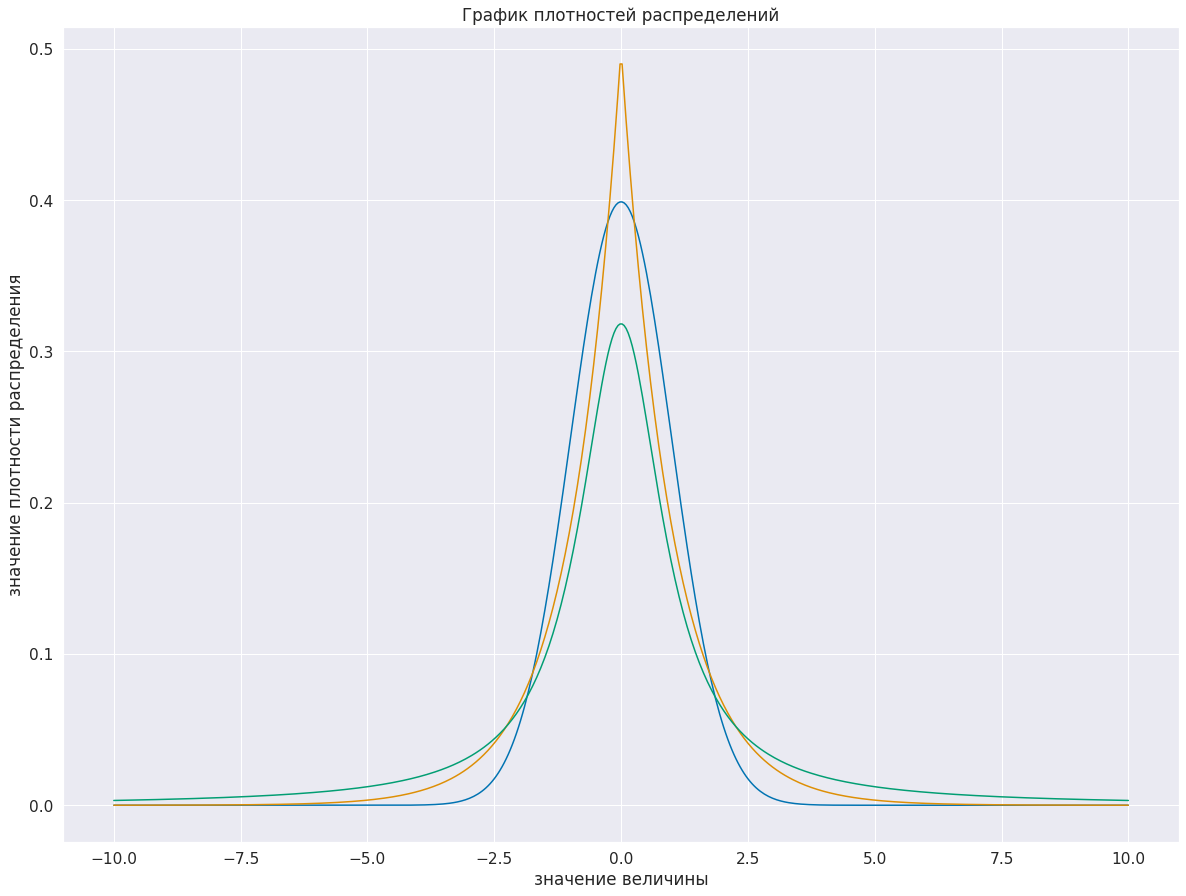

In [4]:
grid = np.linspace(-10, 10, 500)

plt.figure(figsize=(20, 15))
plt.plot(grid, norm_distr.pdf(grid), color = color_for_normal, label = 'Нормальное распределение')
plt.plot(grid, laplacian_distr.pdf(grid), color = color_for_laplace, label = 'Распределение Лапласа')
plt.plot(grid, cauchy_distr.pdf(grid), color = color_for_cauchy, label = 'Распределение Коши')
plt.title('График плотностей распределений')
plt.xlabel('значение величины')
plt.ylabel('значение плотности распределения')
plt.show()

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:** Думаю, что для распределения Коши, т. к. у него нет теоретического мат. ожидания

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [5]:
import math

def truncated_mean(sample, alpha=0.3):
    sorted = np.sort(sample)
    size = sorted.shape[0]
    modified = sorted[int(size*alpha) : size - 1 - int(size*alpha)]
    return np.mean(modified)

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [6]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    u = distr.ppf(1 - alpha)
    integ = quad(func=lambda x: x**2 * distr.pdf(x), a=0, b=u)[0]
    return 2 * (integ + alpha * np.square(u)) / (1 - 2 * alpha)**2

Постройте графики для фсимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

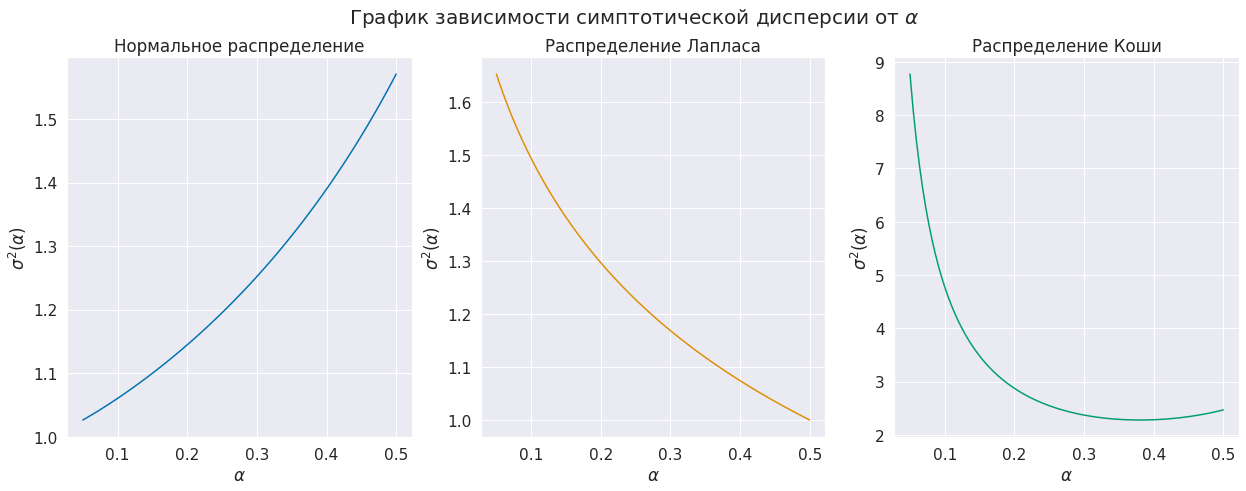

In [7]:
alpha_grid = np.linspace(0.05, 0.49999, 100)

asym_var_array =[[asymp_var(norm_distr, alpha) for alpha in alpha_grid],
                      [asymp_var(laplacian_distr, alpha) for alpha in alpha_grid],
                      [asymp_var(cauchy_distr, alpha) for alpha in alpha_grid]] 
fig, ax = plt.subplots(1, 3, figsize=(21,7))
titles = ['Нормальное распределение', 'Распределение Лапласа', 'Распределение Коши']
for i in range(0, 3):
  ax[i].plot(alpha_grid, asym_var_array[i], color=sns.color_palette("colorblind")[i])
  ax[i].set_title(titles[i])
  ax[i].set_xlabel(r'$\alpha$')
  ax[i].set_ylabel(r'$\sigma^2(\alpha)$')

fig.suptitle('График зависимости симптотической дисперсии от $\\alpha$', fontsize=20)
plt.show()

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:**  усеченное среднее порядка 0 - это математическое ожидание, а порядка 0.5 - медиана. По графику видно, что
для нормального распределения лучше всего использовать среднее значение, а для распределения Лапласа медиану
у распределения Коши огромный разлет у среднего, а усеченное среднее порядка где-то 0.35 имеет минимальную дисперсию.

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [8]:
norm_mean = np.cumsum(norm_X) / np.arange(1, N + 1)
laplacain_mean = np.cumsum(laplacain_X) / np.arange(1, N + 1)
cauchy_mean = np.cumsum(cauchy_X) / np.arange(1, N + 1)

norm_median = np.array([np.median(norm_X[:i]) for i in range(1, N + 1)])
laplacain_median = np.array([np.median(laplacain_X[:i]) for i in range(1, N + 1)])
cauchy_median = np.array([np.median(cauchy_X[:i]) for i in range(1, N + 1)])

norm_trunc_mean = np.array([truncated_mean(norm_X[:i], 0.35) for i in range(1, N + 1)])
laplacain_trunc_mean = np.array([truncated_mean(laplacain_X[:i], 0.35) for i in range(1, N + 1)])
cauchy_trunc_mean = np.array([truncated_mean(cauchy_X[:i], 0.35) for i in range(1, N + 1)])

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


**Нормальное распределение**

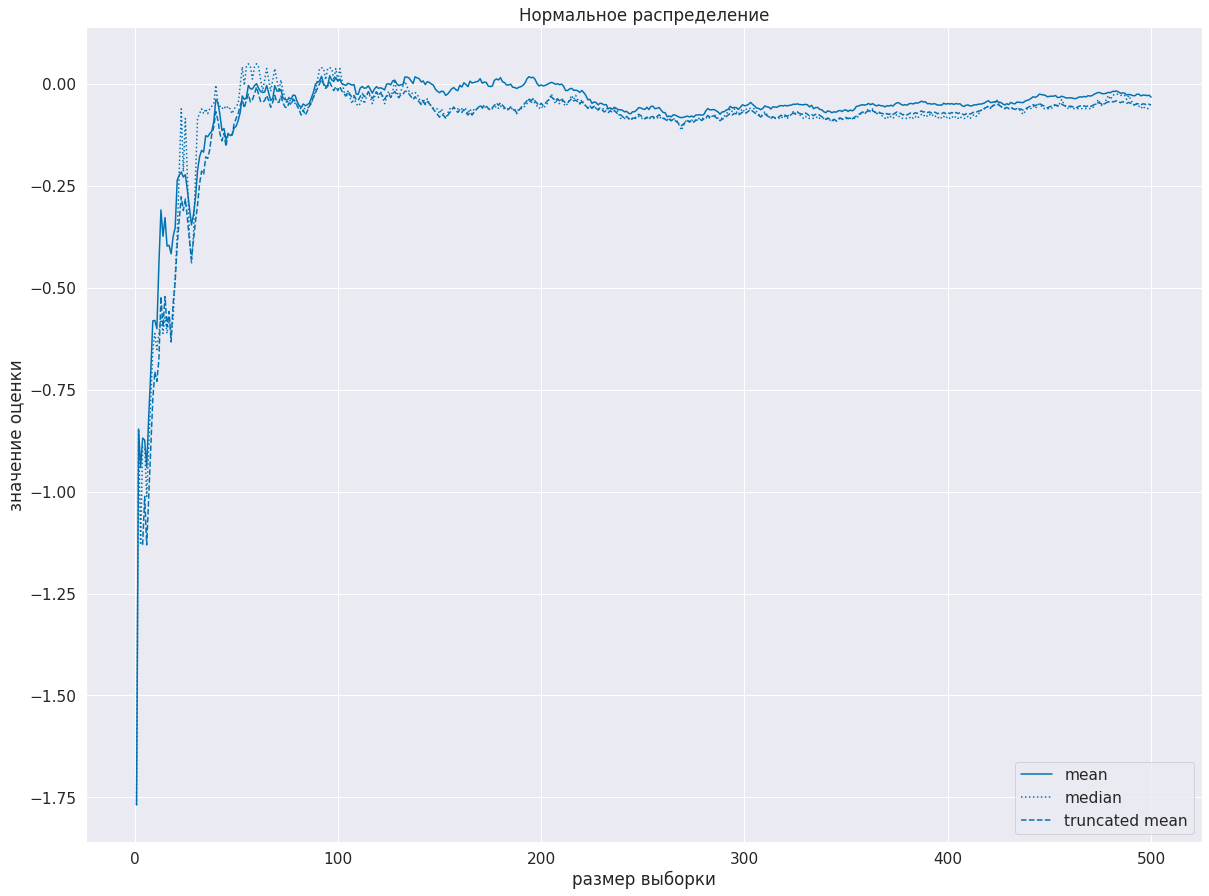

In [10]:
grid = np.arange(1, N + 1)
plt.figure(figsize=(20, 15))
plt.plot(grid, norm_mean, label='mean', color=color_for_normal)
plt.plot(grid, norm_median, label='median', linestyle=':', color=color_for_normal)
plt.plot(grid, norm_trunc_mean, label='truncated mean', linestyle='--', color=color_for_normal)
plt.xlabel('размер выборки')
plt.ylabel('значение оценки')
plt.title('Нормальное распределение')
plt.legend()
plt.show()

**Распределение Лапласа**

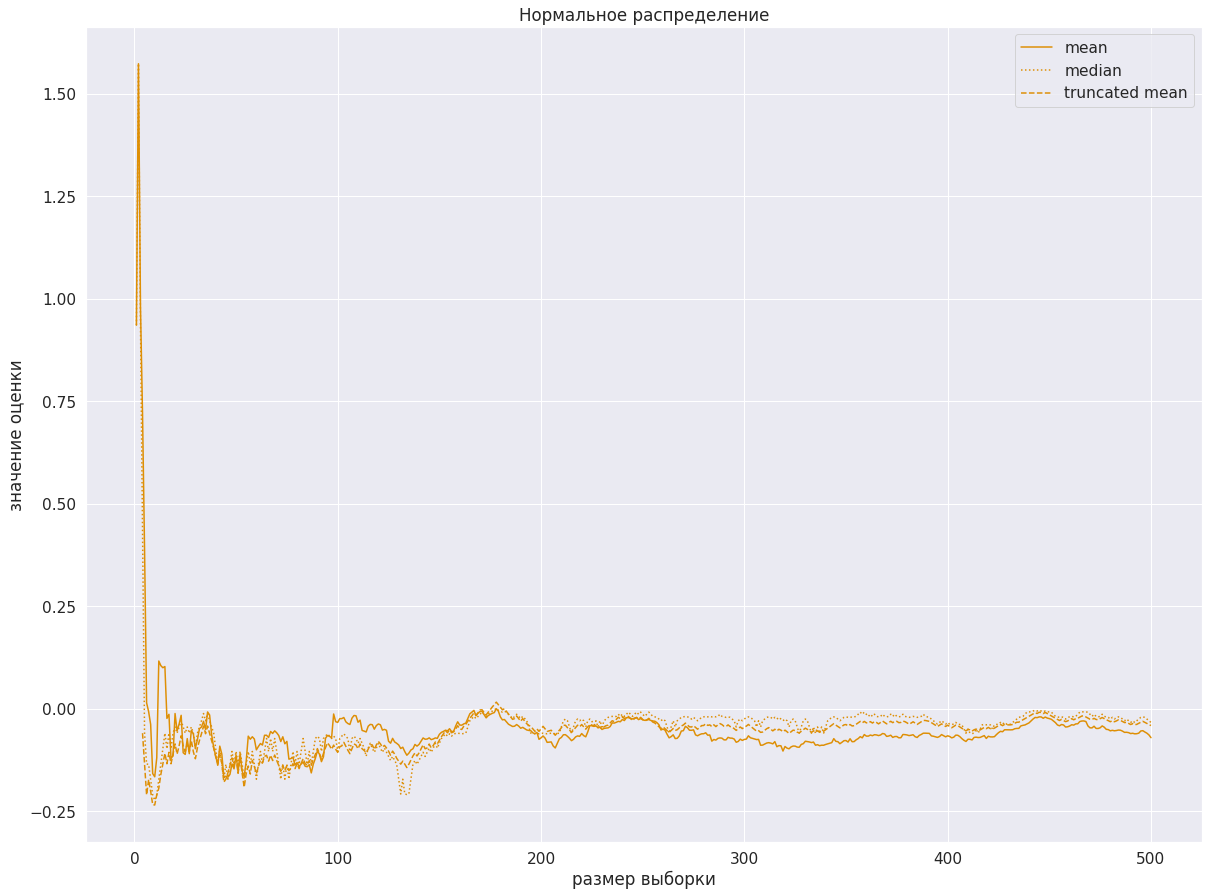

In [11]:
grid = np.arange(1, N + 1)
plt.figure(figsize=(20, 15))
plt.plot(grid, laplacain_mean, label='mean', color=color_for_laplace)
plt.plot(grid, laplacain_median, label='median', linestyle=':', color=color_for_laplace)
plt.plot(grid, laplacain_trunc_mean, label='truncated mean', linestyle='--', color=color_for_laplace)
plt.xlabel('размер выборки')
plt.ylabel('значение оценки')
plt.title('Нормальное распределение')
plt.legend()
plt.show()

**Распределение Коши**

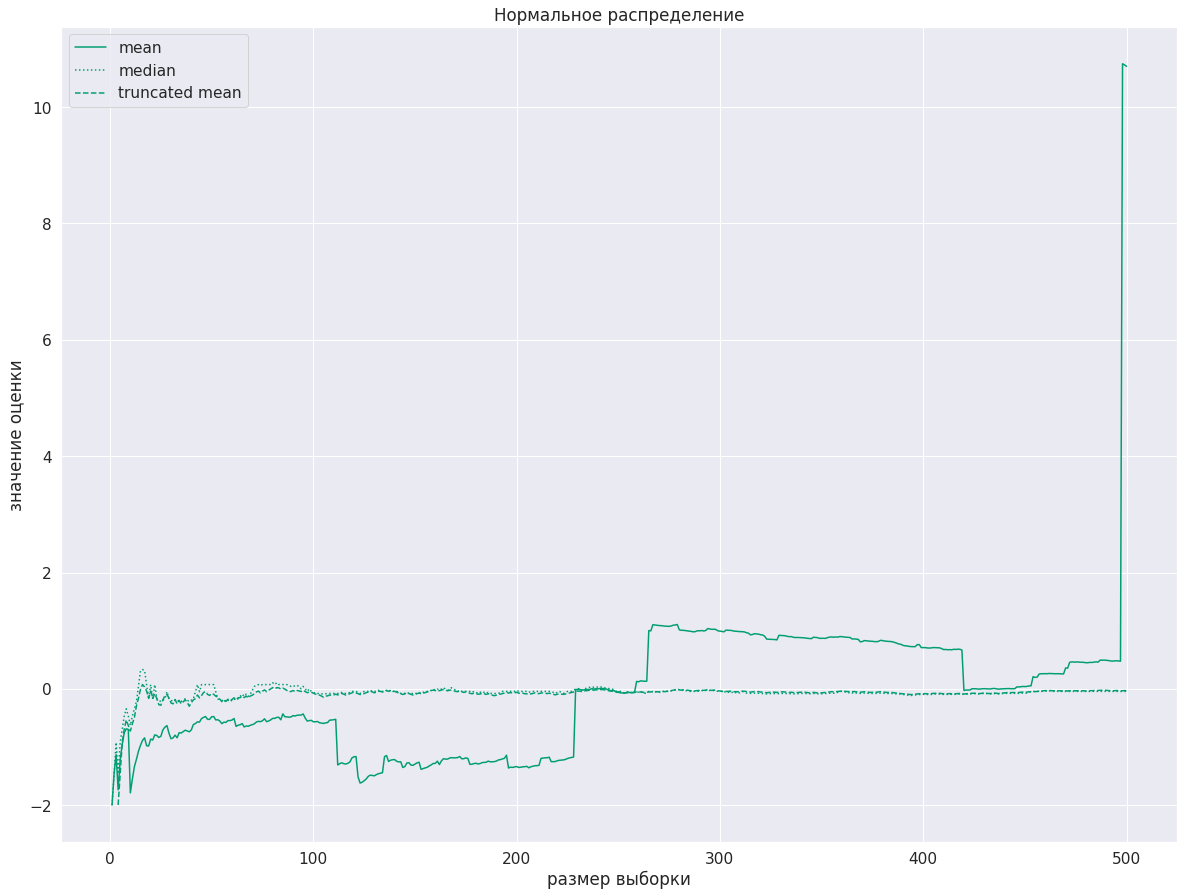

In [12]:
grid = np.arange(1, N + 1)
plt.figure(figsize=(20, 15))
plt.plot(grid, cauchy_mean, label='mean', color=color_for_cauchy)
plt.plot(grid, cauchy_median, label='median', linestyle=':', color=color_for_cauchy)
plt.plot(grid, cauchy_trunc_mean, label='truncated mean', linestyle='--', color=color_for_cauchy)
plt.xlabel('размер выборки')
plt.ylabel('значение оценки')
plt.title('Нормальное распределение')
plt.legend()
plt.show()

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:** Для нормального распределения и распределения Лапласа оценки не сильно отличаются с увеличением n. А вот для распределения Коши медиана и усеченное среднее ведут себя гораздо устойчивее чем стандартное среднее, которое  сильно скачет из-за выбросов.

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [19]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 65.2MB/s]


In [20]:
import pandas as pd

In [21]:
data = pd.read_csv("winequality-red.csv")

In [22]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [23]:
def category(x):
  if x <= 10:
        return 'low alcohol'
  if x > 12:
        return 'high alcohol'
  return 'medium alcohol'
data['category'] = data['alcohol'].apply(category)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low alcohol
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low alcohol
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low alcohol
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,low alcohol
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low alcohol
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium alcohol
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium alcohol
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium alcohol
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [25]:
low_mean  = np.mean(data["residual sugar"][data['category'] == "low alcohol"])
low_mediana= np.median(data["residual sugar"][data['category'] == "low alcohol"])

medium_mean  = np.average(data["residual sugar"][data['category'] == "medium alcohol"])
medium_mediana = np.median(data["residual sugar"][data['category'] == "medium alcohol"])

high_mean = np.average(data["residual sugar"][data['category'] == "high alcohol"])
high_mediana = np.median(data["residual sugar"][data['category'] == "high alcohol"])

category = ['low alcohol', 'medium alcohol', 'high alcohol']
data_sugar=[]
data_sugar.append([low_mean, low_mediana])
data_sugar.append([medium_mean, medium_mediana])
data_sugar.append([high_mean, high_mediana])
df = pd.DataFrame(data_sugar, columns=['mean', 'median'], index=category)
df

,mean,median
low alcohol,2.445984,2.1
medium alcohol,2.592264,2.2
high alcohol,2.760993,2.3


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Чем больше алкоголя, тем больше сахара)

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

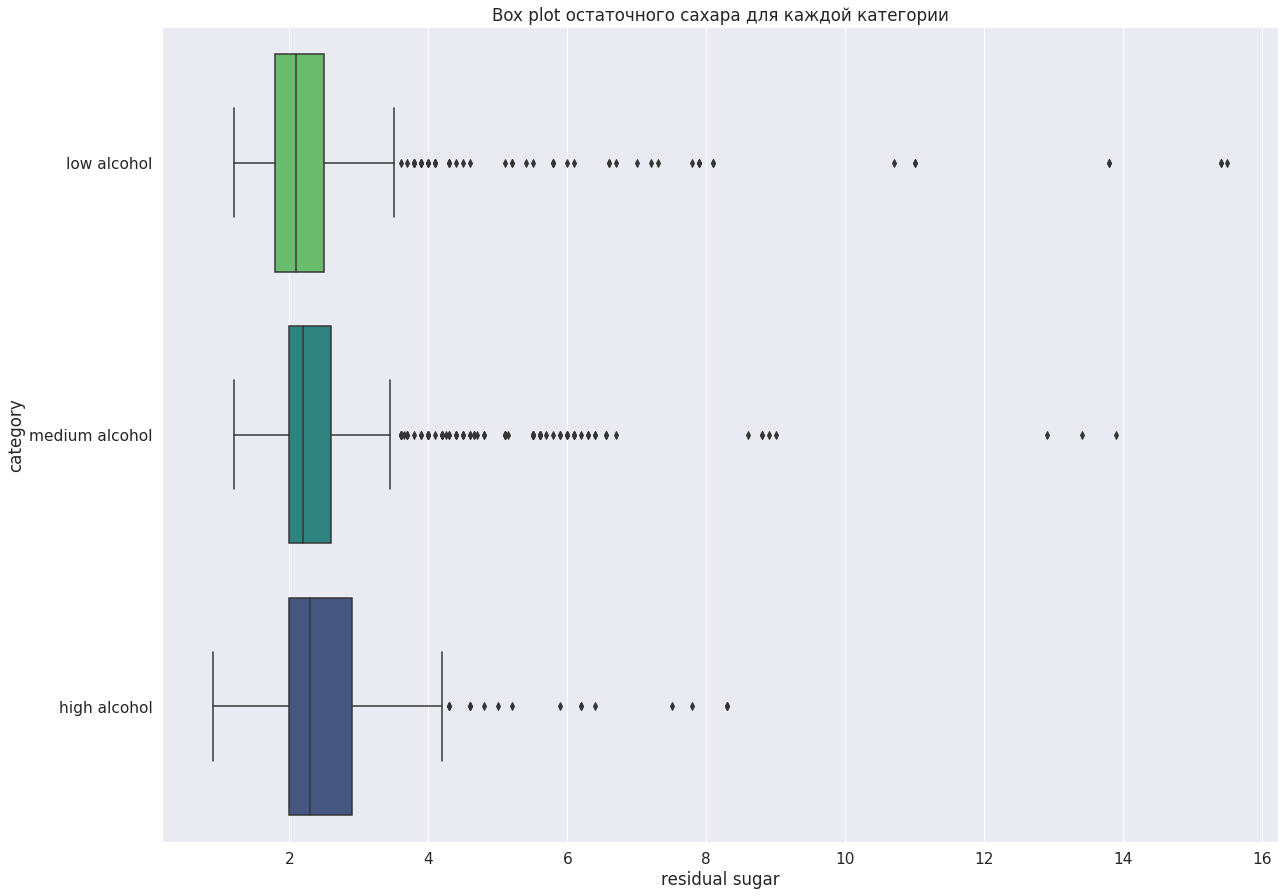

In [27]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
plt.figure(figsize=(20, 15))
plt.title("Содержание сахара")
sns.boxplot(x=data["residual sugar"], y=data['category'], palette=palette)
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:** медианы из боксплота и из предыдущего пункта практически совпали. Видно, что есть выбросы в каждой группе вин, поэтому тут лучше использовать медиану для оценивания содержания сахара.

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

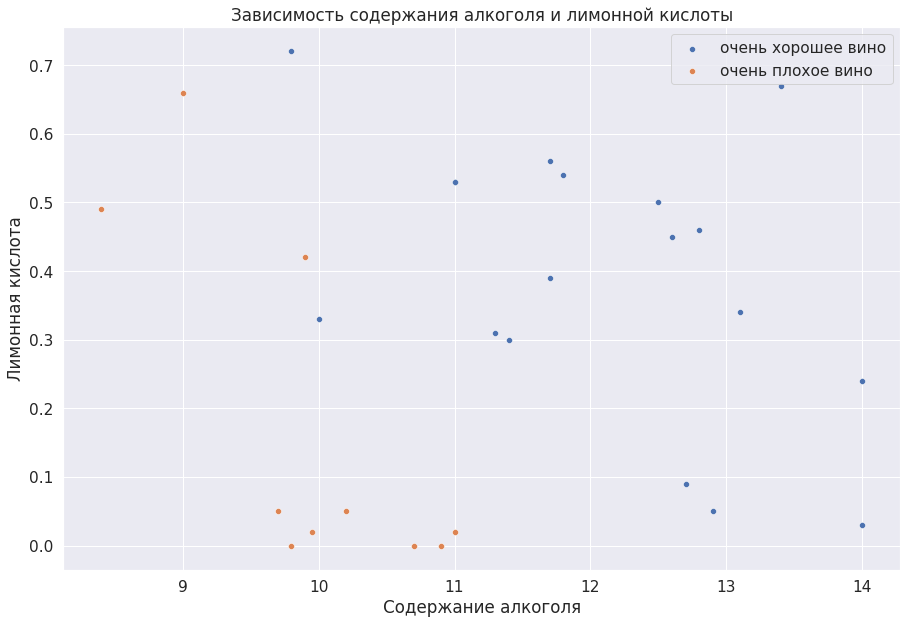

In [30]:
good = data[data['quality'] == 8][['alcohol', 'citric acid']]
bad = data[data['quality'] == 3][['alcohol', 'citric acid']]
plt.figure(figsize=(15,10))
sns.scatterplot(data=good, x="alcohol", y="citric acid", label='очень хорошее вино', palette=[palette[0]]+[palette[-1]])
sns.scatterplot(data=bad, x="alcohol", y="citric acid", label='очень плохое вино', palette=[palette[0]]+[palette[-1]])
plt.title('Зависимость содержания алкоголя и лимонной кислоты')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Лимонная кислота')
plt.show()


Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [31]:
nu_bad = np.mean(np.array(bad), axis=0)
sigma_bad = np.cov(np.array(bad).T)
nu_good = np.mean(np.array(good), axis=0)
sigma_good = np.cov(np.array(good).T)

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [ ]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

In [ ]:
#YOUR CODE GOES HERE

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:**

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $ \theta \in [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

Нижняя оценка дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера равна $\frac{1}{I_X(\theta)}$,
Для распределения $Bern(\theta)$ это  $\frac{\theta (1 - \theta)}{n}$ . Не будем учитывать $n$ при построении графика, т. к. это некоторая константа для каждого $\theta$

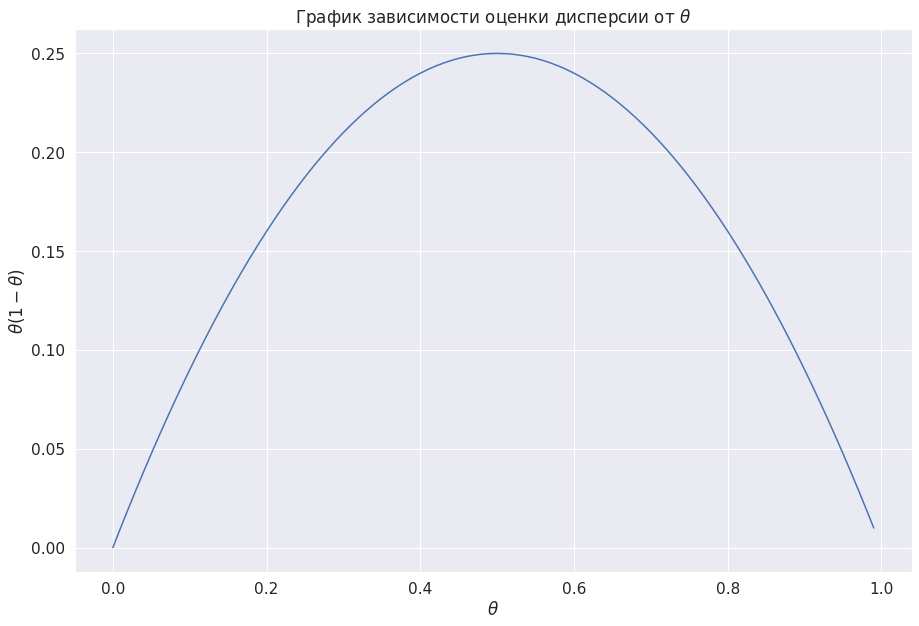

In [37]:
theta_grid = np.arange(0, 1, 0.01)
est =  theta_grid * (1 - theta_grid)
plt.figure(figsize=(15,10))
plt.plot(theta_grid, est)
plt.title(r'График зависимости оценки дисперсии от $\theta$')
plt.ylabel(r'$\theta (1 - \theta)$')
plt.xlabel(r'$\theta$')
plt.show()

Какой можно сделать вывод (напишите в комментариях)?

**Вывод** При $\theta = 0.5$ получается самая высокая оценка снизу.

 Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (количество бутстрепных выборок равно $1000$) этой эффективной оценки $\theta$.

In [49]:
samples = sps.bernoulli(theta_grid).rvs((1000, theta_grid.size))
ind = sps.randint(0, 1000).rvs(size=(1000, 1000))
means = np.mean(samples[ind].T, axis=2)
var_bootstrap_ests = np.mean(np.square(means), axis=1) - np.square(np.mean(means, axis=1))

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

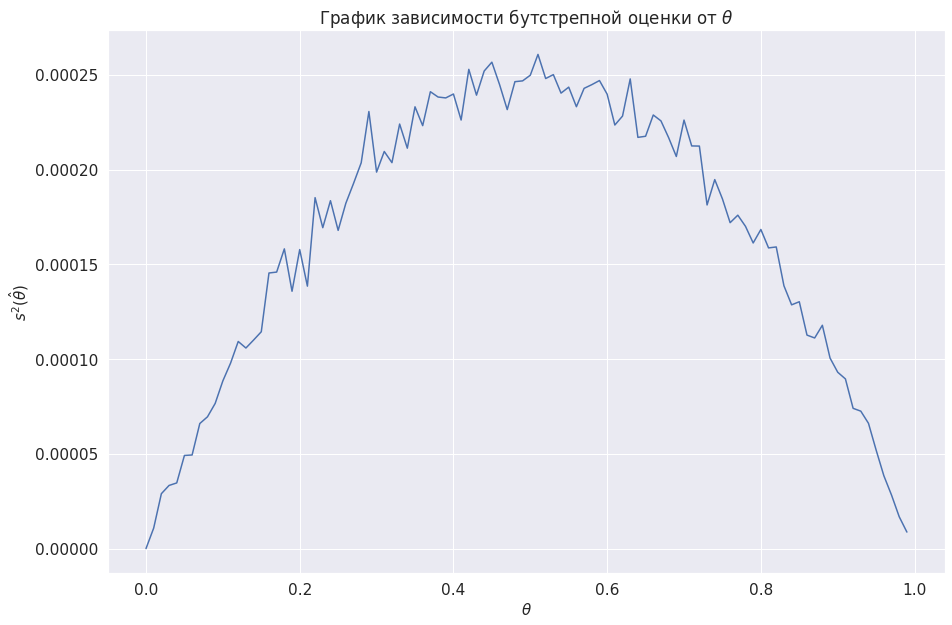

In [51]:
plt.figure(figsize=(15, 10))
plt.plot(theta_grid, var_bootstrap_ests)
plt.title(r"График зависимости бутстрепной оценки от $\theta$")
plt.xlabel(r"$\theta$", fontsize=15)
plt.ylabel(r"$s^2(\hat{\theta})$", fontsize=15)
plt.show()

**Вывод** График бутстрепной оценки дисперсии эффективной оценки приближается к графику зависимости нижней оценки дисперсии произвольной несмещенной оценки.